Import important packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

Uploading the data

In [10]:
dirty_data = pd.read_csv("C://Users//xrist//OneDrive//Υπολογιστής//Github_repos//Data_Analysis_With_Dirty_Data//messy_data.csv", sep = ';', encoding='latin-1')

Tranform into DataFrame to handle the data more easily

In [11]:
df = pd.DataFrame(dirty_data)

In [12]:
df.head()

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Unnamed: 8,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,NaN,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,NaN,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,NaN,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,NaN,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,NaN,$ 222831817,1.780.147,"8,9f"


**USEFUL INFORMATIONS OF DATA**

In [13]:
df.shape

(101, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMBD title ID   100 non-null    object 
 1   Original titlÊ  100 non-null    object 
 2   Release year    100 non-null    object 
 3   Genrë¨          100 non-null    object 
 4   Duration        99 non-null     object 
 5   Country         100 non-null    object 
 6   Content Rating  77 non-null     object 
 7   Director        100 non-null    object 
 8   Unnamed: 8      0 non-null      float64
 9   Income          100 non-null    object 
 10   Votes          100 non-null    object 
 11  Score           100 non-null    object 
dtypes: float64(1), object(11)
memory usage: 9.6+ KB


In [15]:
df.index

RangeIndex(start=0, stop=101, step=1)

**DATA CLEANING**

Rename the columns to more aproppriate names

In [17]:
df.columns

Index(['IMBD title ID', 'Original titlÊ', 'Release year', 'Genrë¨', 'Duration',
       'Country', 'Content Rating', 'Director', 'Unnamed: 8', 'Income',
       ' Votes ', 'Score'],
      dtype='object')

In [18]:
df.columns = df.columns.str.replace(" ", "_")

In [19]:
df.rename(
    columns = {
        "Original_titlÊ" : "Original_title",
        'Genrë¨' : 'Genre',
        "_Votes_" : "Votes"
    },
inplace = True    
)

The column **Unnamed: 8** has NULL values so we must drop it!

In [20]:
df.drop(["Unnamed:_8"], axis = 1, inplace = True)

Also we are going to drop NULL rows

In [21]:
df.dropna(thresh = 11,inplace = True)

The **dirty_data** has some error values in columns so we must fix it!

1. We begin with **Score** column

In [22]:
df.at[2, 'Score'] = 9.0
df.at[3, 'Score'] = 9.0
df.at[4, 'Score'] = 8.9
df.at[5, 'Score'] = 8.9
df.at[8, 'Score'] = 8.8
df.at[10, 'Score'] = 8.8
df.at[15, 'Score'] = 8.7
df.at[16, 'Score'] = 8.7

2. We continue with **Release_year** column

In [23]:
df.loc[83, 'Release_year'] = '1983-01-12'

In [24]:
df.loc[84, 'Release_year'] = '1976-02-09'

In [25]:
df['Release_year'] = pd.to_datetime(df.Release_year)

C:\Users\xrist\AppData\Local\Temp\ipykernel_9868\943627111.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Release_year'] = pd.to_datetime(df.Release_year)


3. Next is the column **Duration**

In [26]:
df['Duration'] = df['Duration'].replace(" ", 0)
df['Duration'] = df['Duration'].replace('178c', 178)
df['Duration'] = df['Duration'].replace("Inf", 0)
df['Duration'] = df['Duration'].replace("Nan", 0)
df['Duration'] = df['Duration'].replace("-", 0)
df['Duration'] = df['Duration'].replace("Not Applicable", 0)

4. Column **Income**

In [27]:
df.loc[3, 'Income'] = "$ 408035783"

In [28]:
df['Income'] = df['Income'].astype('string')

In [29]:
df['Income'] = df['Income'].str.replace('$', '', regex = True)

In [30]:
df['Income'] = df['Income'].astype('int32')

5. We continue with column **Votes**

In [31]:
df['Votes'] = df['Votes'].astype('string')
df['Votes'] = df['Votes'].str.replace('.', '', regex = True)

In [32]:
df['Votes'] = df['Votes'].astype('int32')

We split the **Genre** column and later we drop it.

In [33]:
df[['Genre1', 'Genre2', 'Genre3']] = df['Genre'].str.split(expand = True)

In [34]:
df.drop('Genre', axis = 1, inplace=True)

In [35]:
df['Genre1'] = df['Genre1'].astype('string')
df['Genre2'] = df['Genre2'].astype('string')
df['Genre3'] = df['Genre3'].astype('string')

In [36]:
df['Genre1'] = df['Genre1'].str.replace(',', '')
df['Genre2'] = df['Genre2'].str.replace(',', '')
df['Genre3'] = df['Genre3'].str.replace(',', '')

In [37]:
df[['Genre1', 'Genre2', 'Genre3']].fillna('None', inplace = True)

C:\Users\xrist\AppData\Local\Temp\ipykernel_9868\3600621952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Genre1', 'Genre2', 'Genre3']].fillna('None', inplace = True)


In [89]:
df[df['Country'] == 'US.']

,IMBD_title_ID,Original_title,Release_year,Duration,Country,Content_Rating,Director,Income,Votes,Score,Genre1,Genre2,Genre3
24,tt0120689,The Green Mile,2000-10-03,189,US.,R,Frank Darabont,286801374,1112336,8.6,Crime,Drama,Fantasy


A wrong value for New Zealand & US

In [90]:
df.at[11, 'Country'] = 'New Zealand'
df.at[15, 'Country'] = 'New Zealand'
df.at[2, 'Country'] = 'USA'
df.at[24, 'Country'] = 'USA'

**DATA FILTERING**

Sum of countries that the production is located

In [91]:
countries_sum = df['Country'].value_counts()

Text(0.5, 1.0, 'Countries that productions are located')

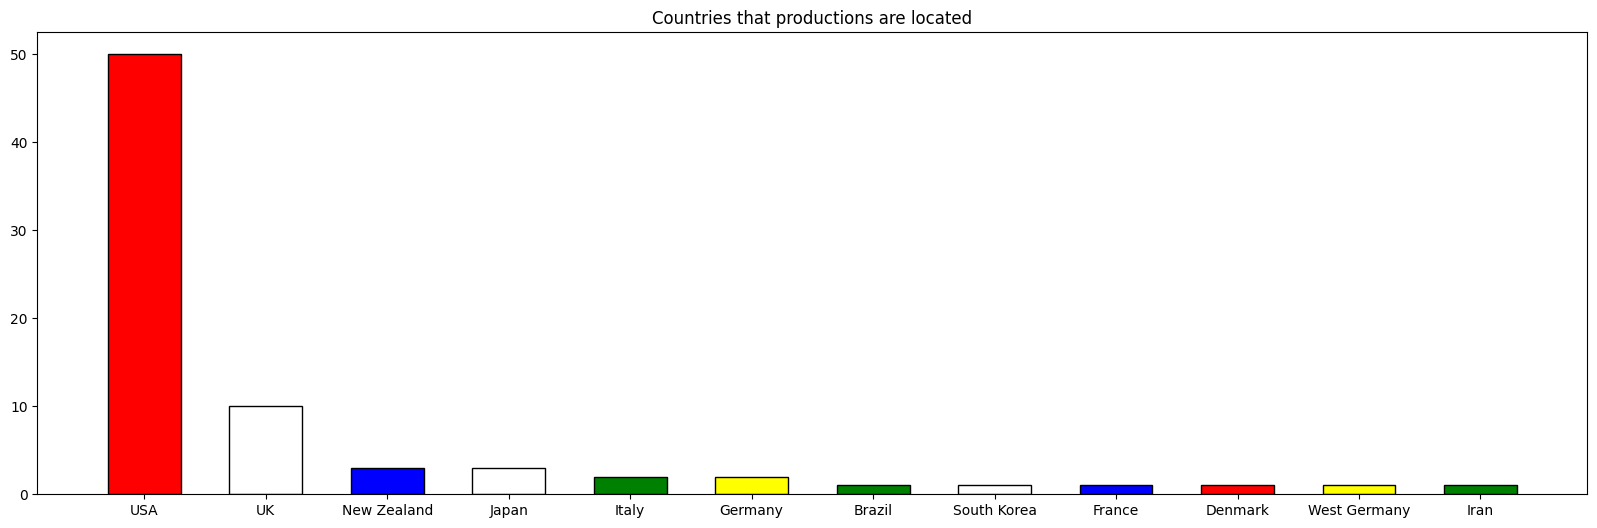

In [96]:
plt.figure(figsize = (20, 6))
color_list = ['red', 'white', 'blue', 'white', 'green', 'yellow', 'green', 'white', 'blue', 'red', 'yellow', 'green']
plt.bar(countries_sum.index, countries_sum, width = 0.6, color = color_list, edgecolor = 'black')
plt.title('Countries that productions are located')

**Top 10 Votes**

In [ ]:
df.sort_values(by = 'Votes', ascending= False).head(10)

,IMBD_title_ID,Original_title,Release_year,Genre,Duration,Country,Content_Rating,Director,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,28815245,2278845,9.3
2,tt0468569,The Dark Knight,2008-07-23,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,1005455211,2241615,9.0
8,tt1375666,Inception,2010-09-24,"Action, Adventure, Sci-Fi",148,USA,PG-13,Christopher Nolan,869784991,2002816,8.8
9,tt0137523,Fight Club,1999-10-29,Drama,0,UK,R,David Fincher,101218804,1807440,8.8
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",0,USA,R,Quentin Tarantino,222831817,1780147,8.9
10,tt0109830,Forrest Gump,1994-10-06,"Drama, Romance",142,USA,PG-13,Robert Zemeckis,678229452,1755490,8.8
11,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2002-01-18,"Action, Adventure, Drama",178,New Zesland,PG-13,Peter Jackson,887934303,1619920,8.8
5,tt0167260,The Lord of the Rings: The Return of the King,2004-02-22,"Action, Adventure, Drama",201,New Zealand,PG-13,Peter Jackson,1142271098,1604280,8.9
1,tt0068646,The Godfather,1972-09-21,"Crime, Drama",175,USA,R,Francis Ford Coppola,246120974,1572674,9.2
50,tt1345836,The Dark Knight Rises,2012-08-29,"Action, Adventure",164,UK,PG-13,Christopher Nolan,1081133191,1480582,8.3
